Importación de datos

In [ ]:
import plotly.express as px
import pandas as pd
import glob
import os
#creación de estapcio de trabajo
ruta = 'C:/Users/omarj/OneDrive/Documentos/Ucatolica/proyecto/data/'
ruta2 = 'C:/Users/omarj/OneDrive/Documentos/Ucatolica/proyecto/'
archivos = glob.glob(os.path.join(ruta, '*.xlsx'))
print(f'Se encontro {len(archivos)} archivos Excel')

dataframe =[]

for archivo in archivos:
    print(f'leyendo: {os.path.basename(archivo)}')
    df = pd.read_excel(archivo)
    dataframe.append(df)

df_unificado = pd.concat(dataframe, ignore_index=True, join='outer')

salida = os.path.join(ruta2, 'Agregados-Unificados.csv')
df_unificado.to_csv(salida, index=False, encoding='utf-8')
print(f'✅ Archivos Unificado en: {salida}')
print(df_unificado.head())
print(df_unificado.info())


C:\Users\omarj\AppData\Local\Temp\ipykernel_1640\2773900279.py:6: DtypeWarning: Columns (14,16,18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, encoding='utf-8')


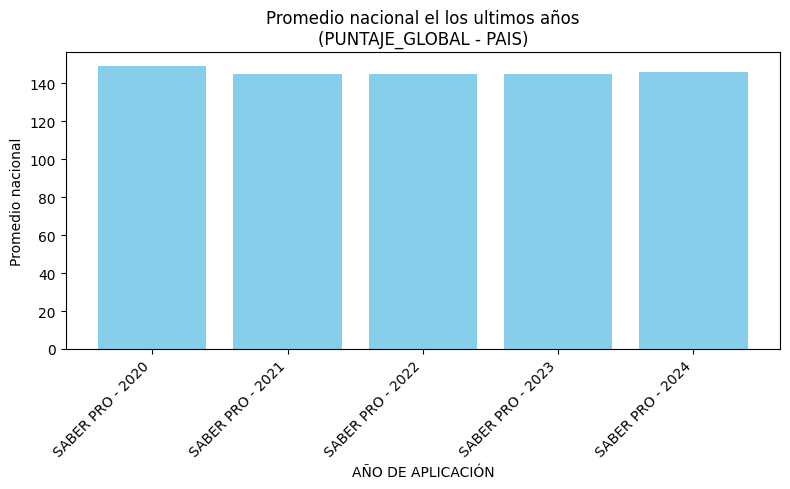

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Leer el archivo CSV
ruta = r'C:/Users/omarj/OneDrive/Documentos/Ucatolica/proyecto/Agregados-Unificados.csv'
df = pd.read_csv(ruta, encoding='utf-8')

# 2️⃣ Especificar los valores de filtro
Agregacion = 'PAIS' #TOMAMOS LOS PUNTAJES A NIVEL NACIONAL
Medida_agregacion = 'PUNTAJE_GLOBAL'   # VAMOS A TENER PUNTAJES GLOBALES

# 3️⃣ Filtrar según variable2 y variable4
df_filtrado = df[(df['AGREGACION'] == Agregacion) & (df['MEDIDA_AGREGACION'] == Medida_agregacion)]

# 4️⃣ Agrupar por variable1 y calcular la media (o conteo) de la variable5 (razón)
#    Si "razon" es numérica:
resumen = df_filtrado.groupby('EXAMEN')['PROMEDIO_GLOBAL'].mean().reset_index()

# 5️⃣ Graficar en barras
plt.figure(figsize=(8,5))
plt.bar(resumen['EXAMEN'], resumen['PROMEDIO_GLOBAL'], color='skyblue')
plt.xlabel('AÑO DE APLICACIÓN')
plt.ylabel('Promedio nacional')
plt.title(f'Promedio nacional el los ultimos años\n({Medida_agregacion} - {Agregacion})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\omarj\AppData\Local\Temp\ipykernel_6376\3474908481.py:10: DtypeWarning: Columns (14,16,18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, encoding='utf-8')


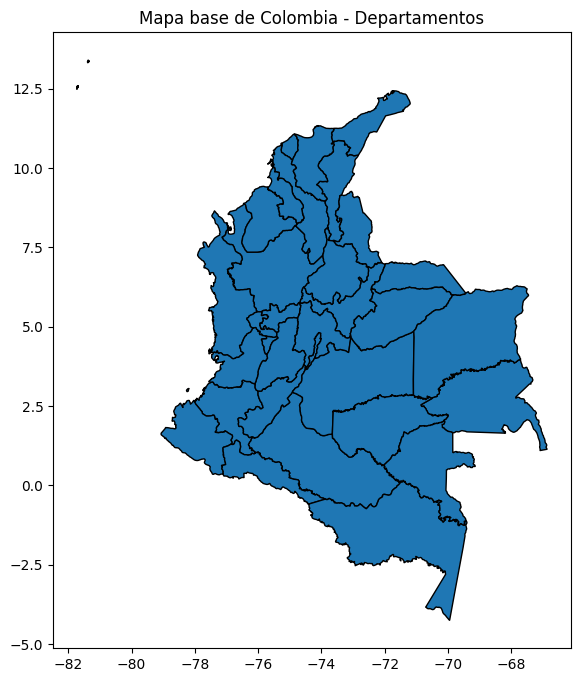

In [ ]:
# Creación de mapa termino segun resultados.
import pandas as pd
import folium
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar tus datos
# 1️⃣ Leer el archivo CSV
ruta = r'C:/Users/omarj/OneDrive/Documentos/Ucatolica/proyecto/Agregados-Unificados.csv'
df = pd.read_csv(ruta, encoding='utf-8')

# 2️⃣ Especificar los valores de filtro
Año = 'SABER PRO - 2024' #TOMAMOS LOS PUNTAJES DEL ULTIMO AÑO
Agregacion = 'DEPARTAMENTO'
Medida_agregacion = 'PUNTAJE_GLOBAL'   # VAMOS A TENER PUNTAJES GLOBALES

# 3️⃣ Filtrar según variable2 y variable4
df_filtrado = df[(df['EXAMEN']== Año)&(df['AGREGACION'] == Agregacion) & (df['MEDIDA_AGREGACION'] == Medida_agregacion)] # Debe tener una columna con el nombre del departamento y una con el valor

# Cargar el mapa geográfico de Colombia
# Puedes usar uno gratuito de DANE o GADM (nivel departamental)
url_geojson = "C:/Users/omarj/OneDrive/Documentos/Ucatolica/proyecto/mapas/depto.json"
colombia = gpd.read_file(url_geojson)

# Visualizar para confirmar
#colombia.plot(edgecolor='black', figsize=(8, 8))
#plt.title("Mapa base de Colombia - Departamentos")
#plt.show()
#print('Columnas disponibles:')
#print(colombia.columns)
colombia['NOMBRE_DPT'] = colombia['NOMBRE_DPT'].replace({
    'SANTAFE DE BOGOTA D.C':'BOGOTÁ'
})
#print(colombia['NOMBRE_DPT'].unique())
#print(df_filtrado['NOMBRE_DEPARTAMENTO'].unique())
# Unir tus datos con el mapa
colombia = colombia.merge(df, left_on='NOMBRE_DPT', right_on='NOMBRE_DEPARTAMENTO')
# Crear mapa centrado en Colombia
m = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Agregar el mapa térmico (choropleth)
folium.Choropleth(
    geo_data=colombia,
    name='choropleth',
    data=colombia,
    columns=['NOMBRE_DEPARTAMENTO', 'PROMEDIO_GLOBAL'],
    key_on='feature.properties.NOMBRE_DPT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Valor por Departamento'
).add_to(m)

# Guardar o mostrar
m.save('mapa_colombia.html')
m
'''




'''
